# Credit Card Fraud Detection - Bautista

### Cargando Librerías y datos

In [391]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings

from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import NearMiss

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
from sklearn.neural_network import MLPClassifier

from sklearn.feature_selection import SelectKBest, f_classif, f_regression, chi2
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [257]:
warnings.filterwarnings("ignore")
plt.style.use('ggplot')
pd.set_option('display.max_columns', None)

In [258]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Verificando tipoos de datos, NA's y duplicados

In [259]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [260]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [261]:
df.duplicated().any()

True

In [262]:
df.drop_duplicates(inplace=True)

### Análisis Estadístico y Exploratorio

In [263]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,-0.001441,0.000202,-0.000715,0.000603,0.000252,0.001043,0.001162,0.000170,0.001515,-0.000264,0.000187,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,1.076407,1.018720,0.994674,0.995430,0.952215,0.914894,0.873696,0.842507,0.837378,0.813379,0.769984,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,-4.797473,-18.683715,-5.791881,-19.214325,-4.498945,-14.129855,-25.162799,-9.498746,-7.213527,-54.497720,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,-0.535578,-0.761649,-0.406198,-0.647862,-0.425732,-0.581452,-0.466860,-0.483928,-0.498014,-0.456289,-0.211469,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,-0.093237,-0.032306,0.139072,-0.012927,0.050209,0.049299,0.067119,-0.065867,-0.002142,0.003367,-0.062353,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,0.453619,0.739579,0.616976,0.663178,0.492336,0.650104,0.523512,0.398972,0.501956,0.458508,0.133207,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,23.745136,12.018913,7.848392,7.126883,10.526766,8.877742,17.315112,9.253526,5.041069,5.591971,39.420904,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


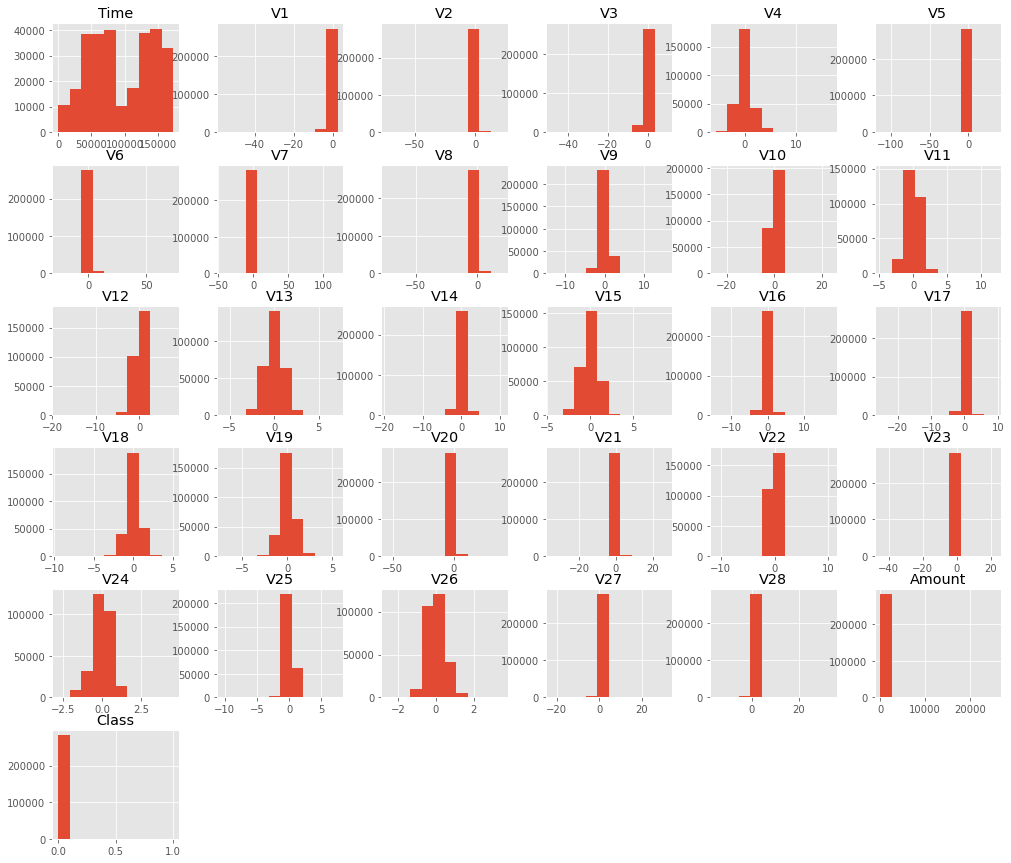

In [264]:
num_bins = 10
df.hist(bins = num_bins, figsize=(17,15))
plt.show()

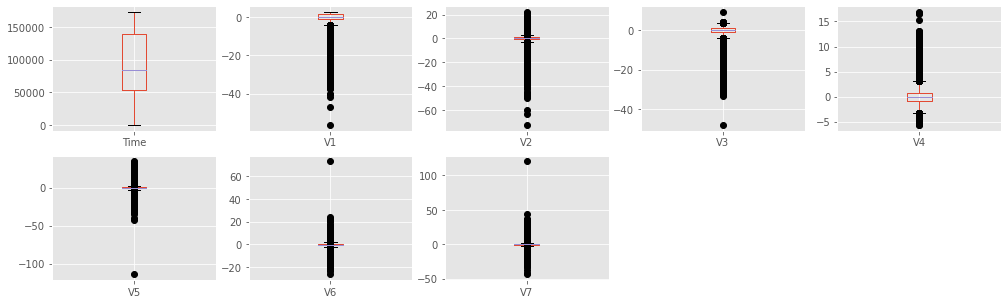

In [265]:
fig = plt.figure(figsize = (17,16))
ax = fig.gca()
df.iloc[:,0:8].rename(columns=lambda x: str(x)).plot(ax=ax, kind= 'box', subplots=True, layout=(6,5), sym='black')
plt.show()

<AxesSubplot:xlabel='V1', ylabel='V2'>

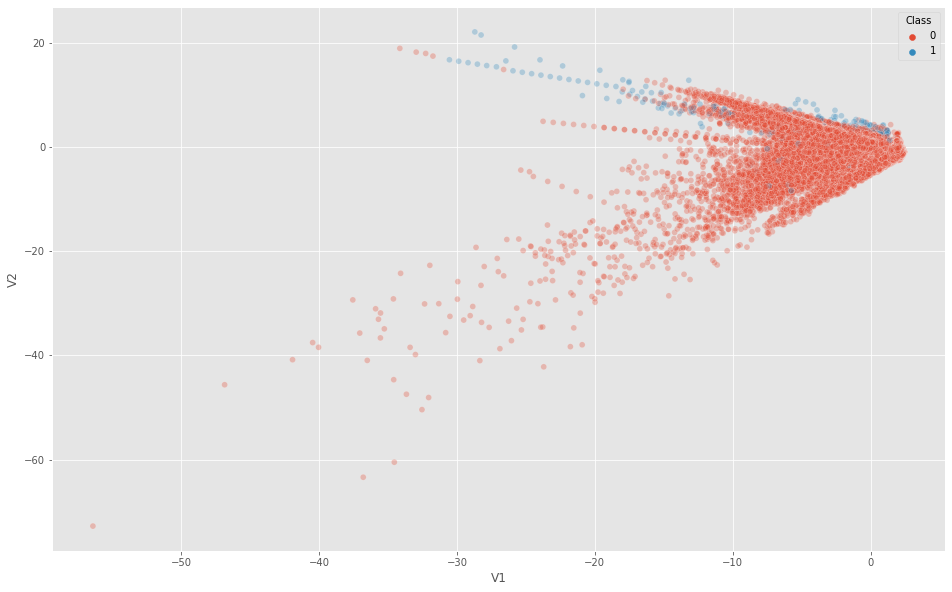

In [269]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="V1", y="V2",
    hue="Class",
    data=df,
    legend="full",
    alpha=0.3
)

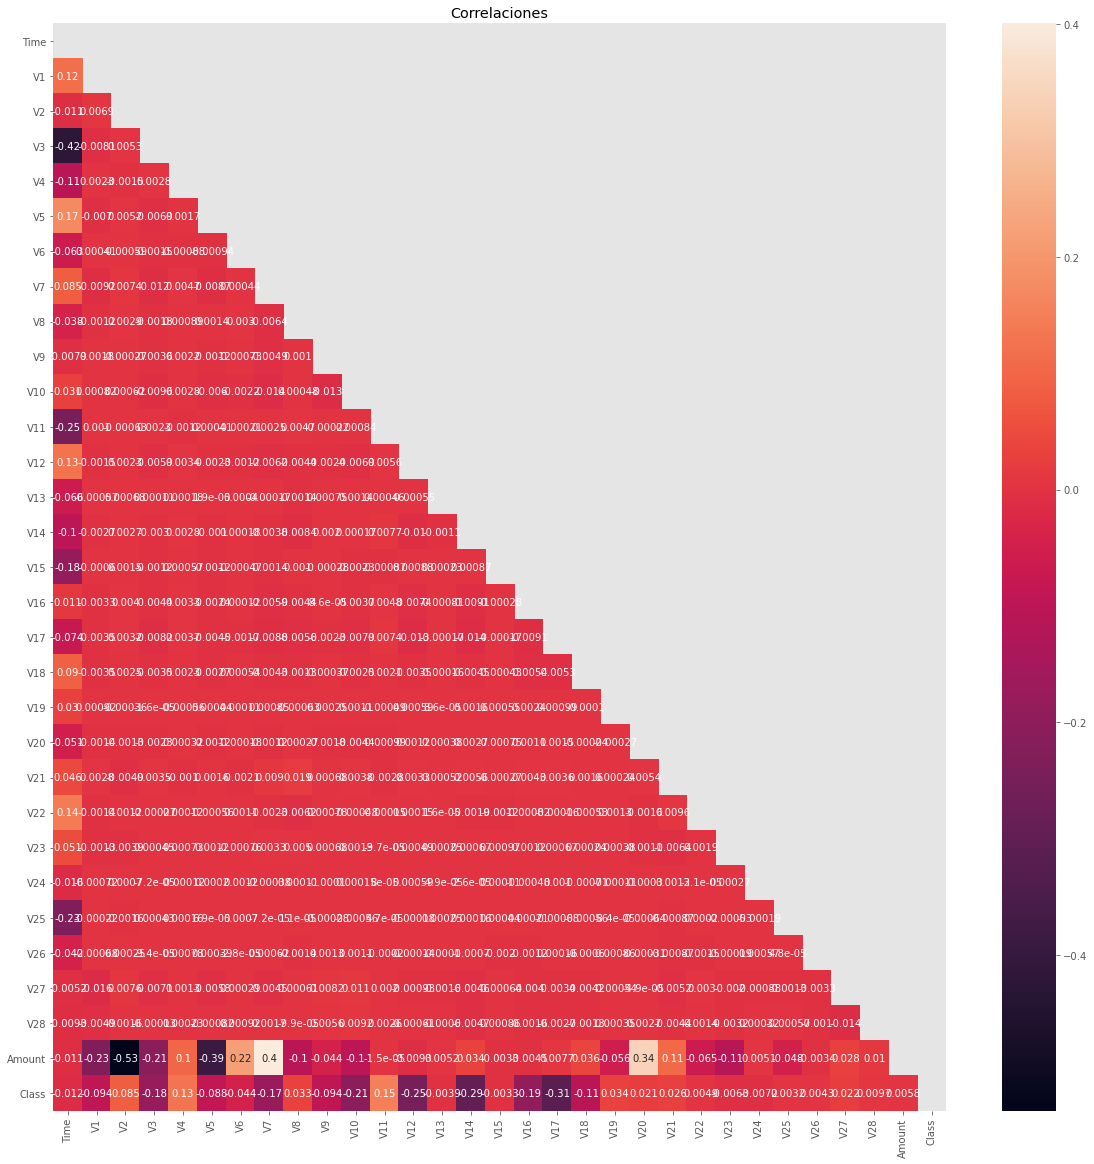

In [266]:
plt.rcParams['figure.figsize'] = (20, 20)

data_corr = df.corr()

mask = np.triu(np.ones_like(data_corr, dtype=bool))

sns.heatmap(data_corr, annot = True, mask=mask)
plt.title('Correlaciones')
plt.show()

In [ ]:
corr = df.iloc[:,0:31].corr()
print(corr['Class'].sort_values(ascending=False), '\n')

Class     1.000000
V11       0.149067
V4        0.129326
V2        0.084624
V19       0.033631
V8        0.033068
V21       0.026357
V27       0.021892
V20       0.021486
V28       0.009682
Amount    0.005777
V22       0.004887
V26       0.004265
V25       0.003202
V15      -0.003300
V13      -0.003897
V23      -0.006333
V24      -0.007210
Time     -0.012359
V6       -0.043915
V5       -0.087812
V9       -0.094021
V1       -0.094486
V18      -0.105340
V7       -0.172347
V3       -0.182322
V16      -0.187186
V10      -0.206971
V12      -0.250711
V14      -0.293375
V17      -0.313498
Name: Class, dtype: float64 



### Elección de Variables y Componentes Principales

Debido a que no se cuenta con las características originales ni su matriz de covariancias como para realizar un criterio de selección de componentes principales como el de Kaiser, se utilizará Select K best mediante f_classif (ANOVA F-value) para elegir qué variables y componentes se terminarán utilizando

In [271]:
X = df.loc[: ,'Time' : 'Amount']
y = df['Class']

In [272]:
X.shape

(283726, 30)

In [273]:
test = SelectKBest(k=10)
fit = test.fit(X,y)

In [274]:
data_scores = pd.DataFrame(fit.scores_)
data_columns = pd.DataFrame(X.columns)

In [275]:
feature_scores = pd.concat([data_columns, data_scores],axis=1)
feature_scores.columns = ['Variable','Score']
print(feature_scores.nlargest(10,'Score'))

   Variable         Score
17      V17  30923.969703
14      V14  26719.606942
12      V12  19029.929570
10      V10  12697.850513
16      V16  10302.274423
3        V3   9755.675863
7        V7   8685.536141
11      V11   6447.910427
4        V4   4826.048761
18      V18   3183.658090


In [276]:
#Primeras 10
X_2 = SelectKBest(k=10).fit_transform(X, y)

In [277]:
filter = fit.get_support()
features = np.array(X.columns)
 
print("Todos:")
print(features)
 
print("Mejores 10:")
print(features[filter])

Todos:
['Time' 'V1' 'V2' 'V3' 'V4' 'V5' 'V6' 'V7' 'V8' 'V9' 'V10' 'V11' 'V12'
 'V13' 'V14' 'V15' 'V16' 'V17' 'V18' 'V19' 'V20' 'V21' 'V22' 'V23' 'V24'
 'V25' 'V26' 'V27' 'V28' 'Amount']
Mejores 10:
['V3' 'V4' 'V7' 'V10' 'V11' 'V12' 'V14' 'V16' 'V17' 'V18']


In [278]:
X = X[features[filter]]

In [279]:
X.shape

(283726, 10)

### Dividiendo Test Train

In [280]:
X_train, X_test, y_train, y_test =train_test_split(X,
                                                   y,
                                                   test_size=0.3, 
                                                   random_state=0, 
                                                   stratify=y)

### Datos Desbalanceados

In [281]:
plt.rcParams['figure.figsize'] = (12, 8)

<AxesSubplot:xlabel='Class', ylabel='count'>

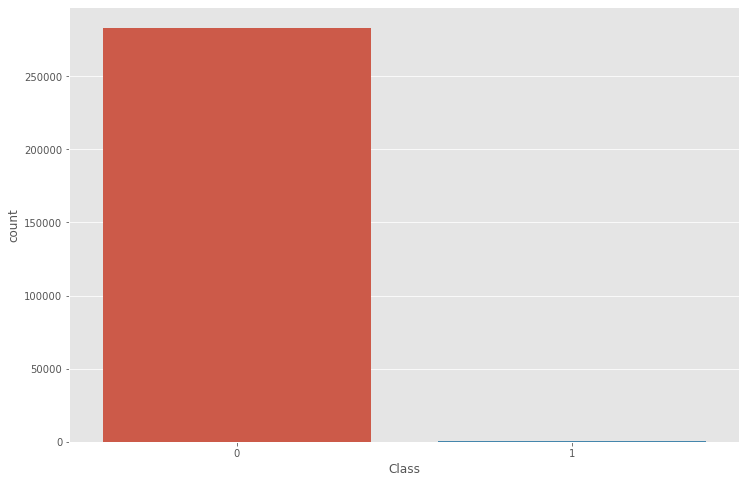

In [282]:
sns.countplot(x='Class', data=df)

In [283]:
df['Class'].value_counts(normalize=True)*100

0    99.83329
1     0.16671
Name: Class, dtype: float64

Frente a que hay un fuerte desbalanceo de datos, se utilizará la técnica de undersampling con NearMiss

In [285]:
scaler = StandardScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [286]:
nm = NearMiss()

In [287]:
X_res, y_res = nm.fit_resample(X_train, y_train)

In [288]:
from collections import Counter

In [289]:
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 331, 1: 331})


In [251]:
y_res.value_counts(normalize=True)*100

1    50.0
0    50.0
Name: Class, dtype: float64

### Probando Modelos

In [302]:
num_folds = 10


models = []
models.append(("KNN", KNeighborsClassifier()))
models.append(("Decision Tree", DecisionTreeClassifier(max_depth=5)))
models.append(("Bagging Trees", BaggingClassifier()))
models.append(("Logistic Regression (L1)", LogisticRegression(penalty='l1', solver='liblinear')))
models.append(("Logistic Regression (L2)", LogisticRegression(penalty='l2')))
models.append(("Random Forest", RandomForestClassifier(n_estimators=200, criterion= 'entropy')))
models.append(("AdaBoost Classifier", AdaBoostClassifier(n_estimators=200)))
models.append(("XGBoost Classifier", xgb.XGBClassifier(n_estimators=200, objective = 'binary:logistic')))
models.append(("Multi-layer Perceptron", MLPClassifier(solver='lbfgs')))

https://machinelearningmastery.com/compare-machine-learning-algorithms-python-scikit-learn/

In [303]:
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits=num_folds)
    cv_results = cross_val_score(model, X_res, y_res, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print(f"{name}: {cv_results.mean():,.3f} ({cv_results.std():,.3f})")

KNN: 0.939 (0.057)
Decision Tree: 0.946 (0.031)
Bagging Trees: 0.955 (0.022)
Logistic Regression (L1): 0.932 (0.060)
Logistic Regression (L2): 0.932 (0.060)
Random Forest: 0.961 (0.014)
AdaBoost Classifier: 0.949 (0.035)
[14:10:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:10:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:10:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric 

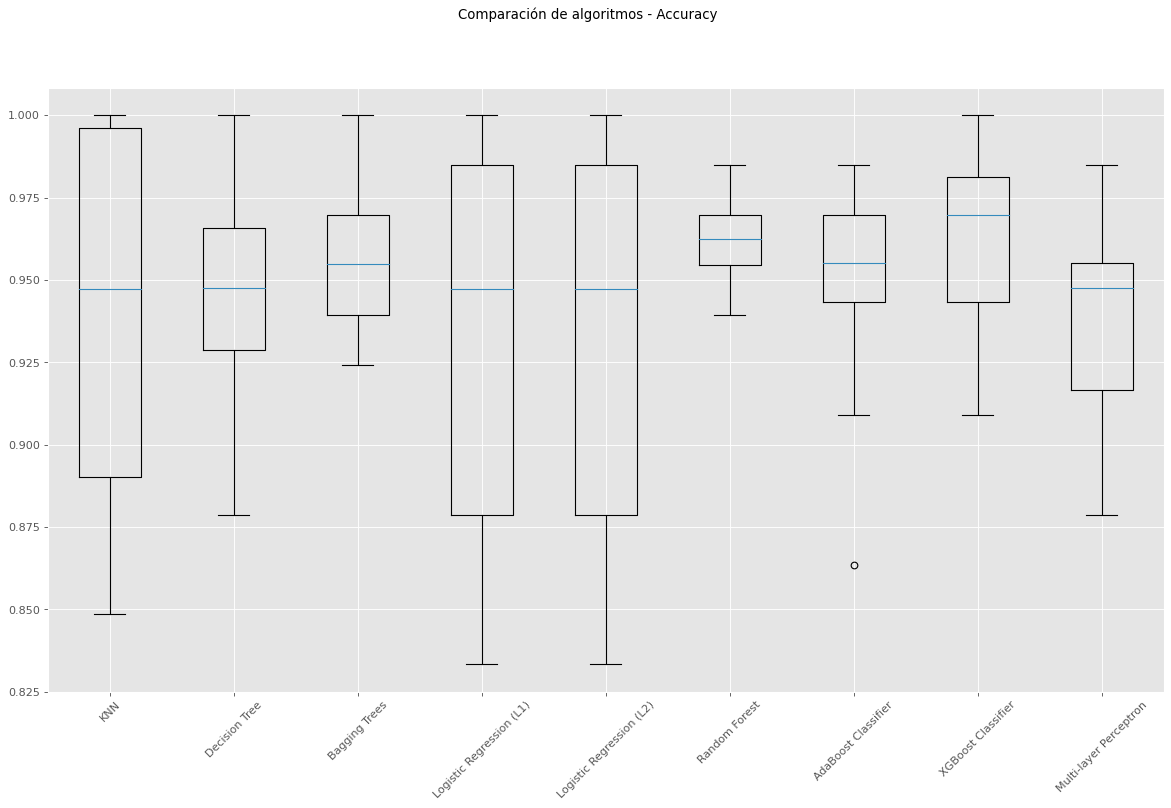

In [305]:
fig = plt.figure(figsize=(18, 10), dpi=80)

fig.suptitle('Comparación de algoritmos - Accuracy')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.xticks(rotation = 45)
plt.show()

In [312]:
results = []
names = []
scoring = 'balanced_accuracy'
for name, model in models:
    kfold = KFold(n_splits=num_folds)
    cv_results = cross_val_score(model, X_res, y_res, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print(f"{name}: {cv_results.mean():,.3f} ({cv_results.std():,.3f})")

KNN: 0.939 (0.057)
Decision Tree: 0.952 (0.034)
Bagging Trees: 0.955 (0.016)
Logistic Regression (L1): 0.933 (0.061)
Logistic Regression (L2): 0.933 (0.061)
Random Forest: 0.961 (0.014)
AdaBoost Classifier: 0.955 (0.023)
[14:14:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric 

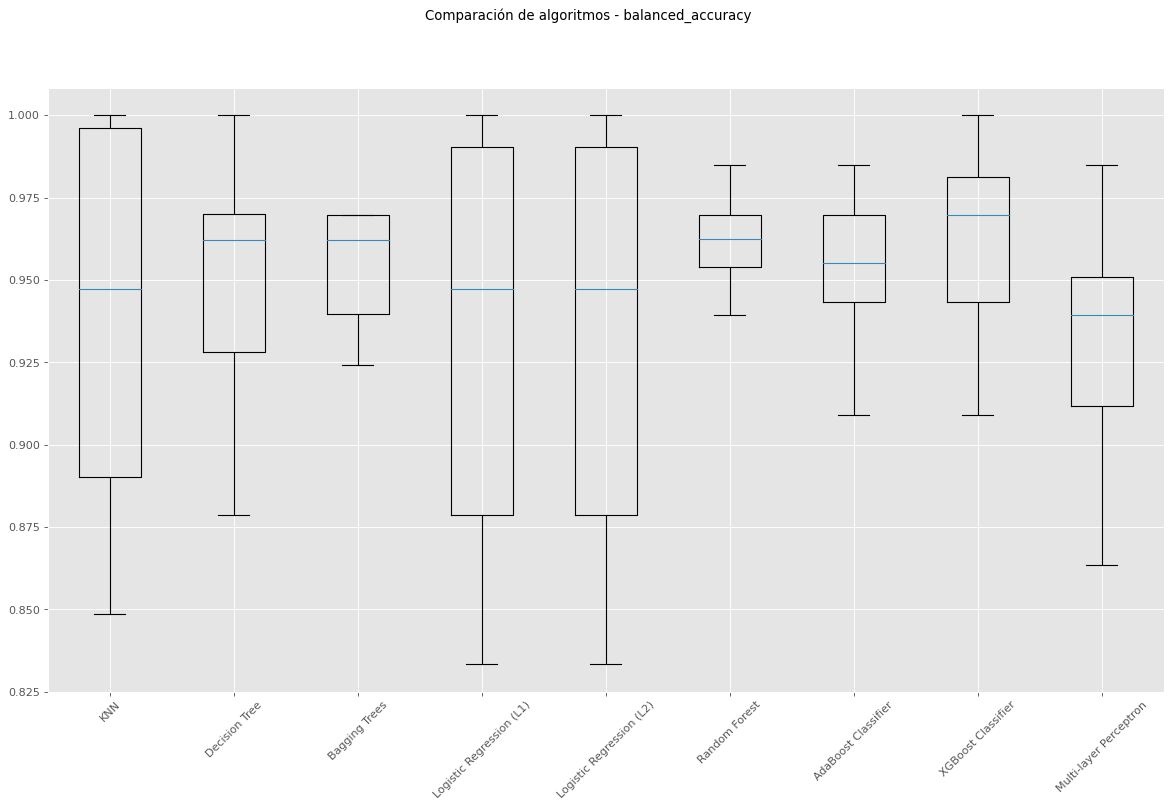

In [313]:
fig = plt.figure(figsize=(18, 10), dpi=80)

fig.suptitle('Comparación de algoritmos - balanced_accuracy')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.xticks(rotation = 45)
plt.show()

In [319]:
results = []
names = []
scoring = 'f1_weighted'
for name, model in models:
    kfold = KFold(n_splits=num_folds)
    cv_results = cross_val_score(model, X_res, y_res, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print(f"{name}: {cv_results.mean():,.3f} ({cv_results.std():,.3f})")

KNN: 0.968 (0.031)
Decision Tree: 0.973 (0.018)
Bagging Trees: 0.977 (0.015)
Logistic Regression (L1): 0.963 (0.032)
Logistic Regression (L2): 0.963 (0.032)
Random Forest: 0.981 (0.009)
AdaBoost Classifier: 0.972 (0.022)
[14:16:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:16:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:16:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric 

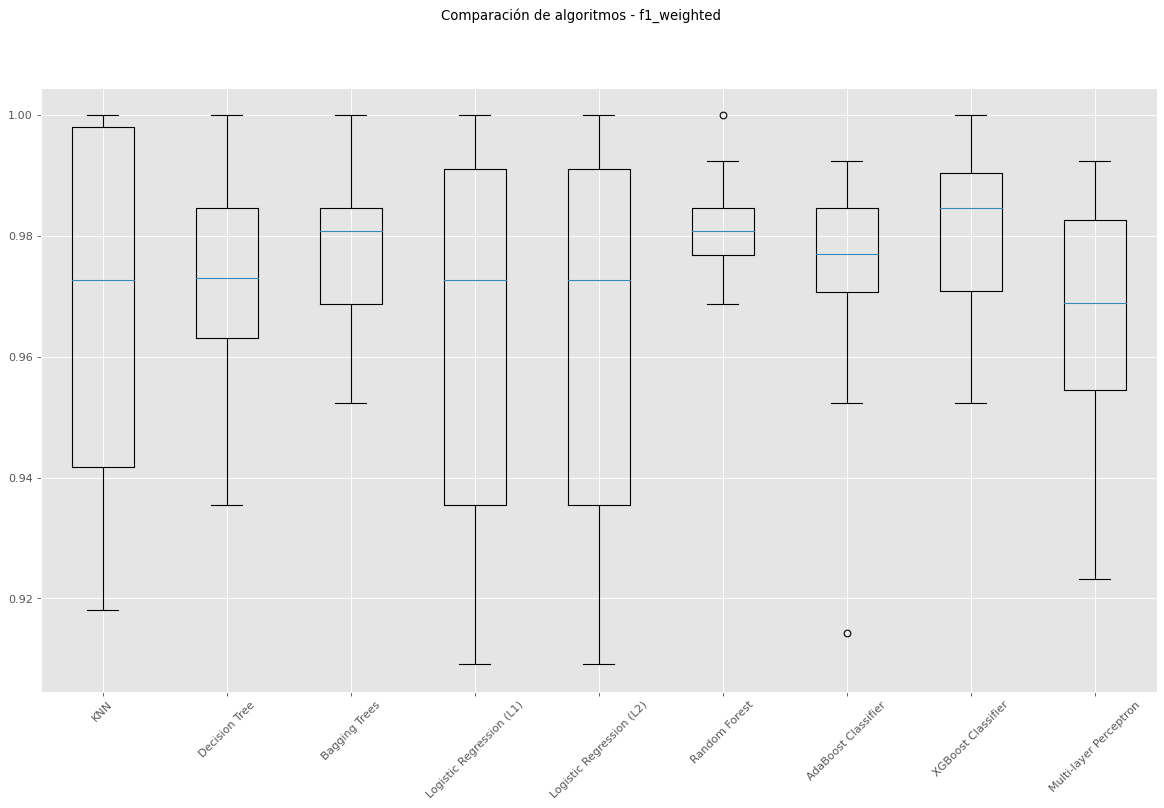

In [320]:
fig = plt.figure(figsize=(18, 10), dpi=80)

fig.suptitle('Comparación de algoritmos - f1_weighted')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.xticks(rotation = 45)
plt.show()

Juzgando por el Accuracy, el Accuracy balanceado y el F1 ponderado mediante los scores de validación cruzada, se puede afirmar que el XGboost classifier tiene un mejor desempeño promedio

### Tuneado XGboost con HYPEROPT 

Fuente del código de optimización: https://www.kaggle.com/prashant111/a-guide-on-xgboost-hyperparameters-tuning

In [354]:
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

In [374]:
space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 180,
        'seed': 0
    }

In [375]:
def objective(space):
    clf=xgb.XGBClassifier(
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']))
    
    evaluation = [(X_res, y_res), ( X_test, y_test)]
    
    clf.fit(X_res, y_res,
            eval_set=evaluation, eval_metric="auc",
            early_stopping_rounds=10,verbose=False)
    

    pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred>0.5)
    print ("SCORE:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }

In [376]:
trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)

SCORE:                                                 
0.9546394417162057                                     
SCORE:                                                                            
0.9983317277191663                                                                
SCORE:                                                                            
0.5569327286825348                                                                
SCORE:                                                                            
0.48323503841725607                                                               
SCORE:                                                                            
0.5487440964308372                                                                
SCORE:                                                                            
0.5506825818275806                                                                
SCORE:                                                    

In [377]:
print("Mejores hyperparametros : ","\n")
print(best_hyperparams)

Mejores hyperparametros :  

{'colsample_bytree': 0.5364543798529855, 'gamma': 1.3339081656326526, 'max_depth': 6.0, 'min_child_weight': 1.0, 'reg_alpha': 174.0, 'reg_lambda': 0.18822303341095292}


### XGBClassifier

In [384]:
model = xgb.XGBClassifier(colsample_bytree=0.5364543798529855,
                      n_estimators=1000, 
                      min_child_weight=1.0,
                      reg_alpha = 174.0,
                      reg_lambda=0.18822303341095292,
                      max_depth=6, 
                      gamma=1.3339081656326526)

In [385]:
model.fit(X_res, y_res)

[15:09:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5364543798529855,
              enable_categorical=False, gamma=1.3339081656326526, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1.0, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=8, num_parallel_tree=1,
              predictor='auto', random_state=0, reg_alpha=174.0,
              reg_lambda=0.18822303341095292, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [386]:
print('Training accuracy:', model.score(X_res, y_res))
print('Testing accuracy:', model.score(X_test, y_test))

Training accuracy: 0.5
Testing accuracy: 0.9983317277191663


### Predicciones

In [387]:
y_pred=model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [390]:
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 99.83%
